# Data generator example

In [28]:
import matplotlib.pyplot as plt
from functools import partial
import tensorflow as tf

In [6]:
from src.sampling.uv_sampling import spider_sampling, random_sampling
from src.dataset import Dataset, PregeneratedDataset, data_map, make_yogadl_dataset, measurement_func, random_crop, data_map_image
from src.operators.NUFFT2D import NUFFT2D


In [3]:
uv = random_sampling(300)

In [11]:
m_op = NUFFT2D()
m_op.plan(uv, (256, 256), (512, 512), (6,6))
y_shape = m_op.n_measurements
ISNR = 30

100%|██████████| 300/300 [00:00<00:00, 3124.93it/s]


In [12]:
# create a tf_func for creating measurements
tf_func, func = measurement_func(uv,  m_op=m_op, Nd=(256,256), data_shape=y_shape, ISNR=ISNR)

In [15]:
# intiliasise dataset
ds = Dataset(100, "COCO")

using dataset COCO with 4957 files


2022-03-16 15:17:10.838754: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-16 15:17:20.083725: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5528 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:1b:00.0, compute capability: 7.0
2022-03-16 15:17:20.085731: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 30 MB memory:  -> device: 1, name: Tesla V100-PCIE-16GB, pci bus id: 0000:1c:00.0, compute capability: 7.0
2022-03-16 15:17:20.087831: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/de

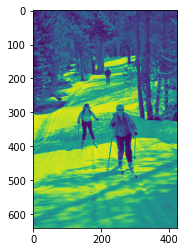

In [23]:
for i in ds.take(1):
    plt.imshow(i)

In [21]:
yogadl_dataset = make_yogadl_dataset(ds) # use yogadl for caching and shuffling the data

In [29]:

# creates
data_map = partial(data_map, y_size=y_shape, z_size=(256,256))
dataset = yogadl_dataset.map(random_crop).map(tf_func).batch(20).map(data_map).prefetch(tf.data.experimental.AUTOTUNE)


(20, 300) (20, 256, 256)


/home/mars/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


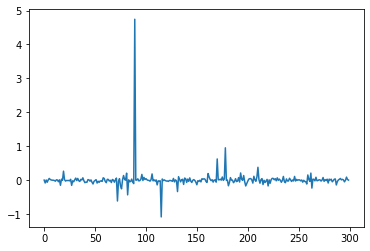

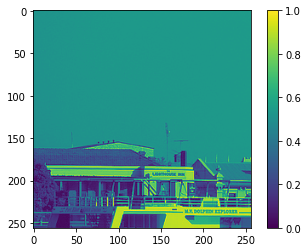

(20, 300) (20, 256, 256)


/home/mars/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


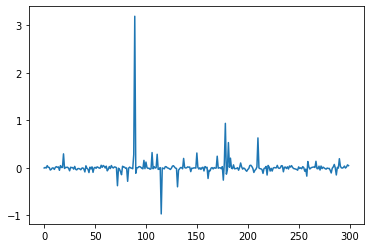

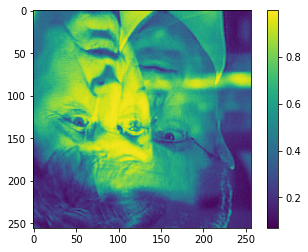

In [41]:
for i in dataset.take(2):
    print(i[0].shape, i[1].shape) # [batch_size, n_measurments], [batch_size, Nd[0], Nd[1]]
    plt.plot(i[0][0])
    plt.show()
    plt.imshow(i[1][0].numpy().real)
    plt.colorbar()
    plt.show()